In [1]:
import random
import numpy as np
import networkx as nx

In [2]:
g = nx.Graph()
g.add_edges_from([(1,2,{'weight': 3}), (1,3,{'weight': 2}), (2,3,{'weight': 1}), 
                      (2,4,{'weight': 4}), (3,4,{'weight': 2}), (3,5,{'weight': 5}), 
                      (4,5,{'weight': 3}), (4,6,{'weight': 1}), (5,6,{'weight': 2})])


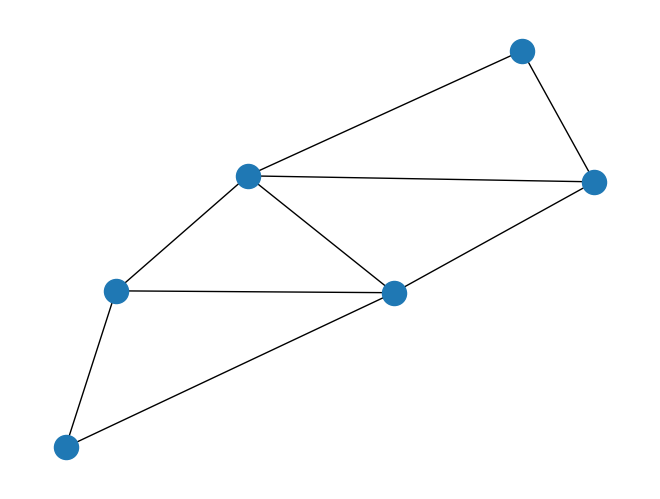

In [3]:
nx.draw(g)

{(0, 1): Text(0.21477508039545068, 0.44263274848182865, '69'),
 (0, 2): Text(-0.27137554694310884, -0.08852170994211564, '13'),
 (0, 3): Text(-0.042024066383134114, 0.5024699600073903, '65'),
 (0, 4): Text(-0.40989005509162185, 0.4812383574172266, '88'),
 (0, 5): Text(-0.04636345506851891, 0.13480025812054597, '46'),
 (0, 6): Text(0.15884233306040318, 0.19137014928948304, '18'),
 (0, 7): Text(-0.15966943215615187, 0.6536433043927856, '42'),
 (0, 8): Text(-0.14776812201467499, -0.1547667897635311, '31'),
 (0, 9): Text(-0.4839228906144858, 0.18579872404470443, '85'),
 (0, 10): Text(0.3935934630446035, 0.27548606984980323, '33'),
 (0, 11): Text(0.00779122090800527, -0.2218150176303067, '21'),
 (0, 12): Text(-0.2957075979746928, 0.13318178926855584, '90'),
 (0, 13): Text(0.1853576346952142, -0.2941875236521701, '74'),
 (0, 14): Text(0.3310286765085963, -0.023178175755936392, '95'),
 (0, 15): Text(-0.5098553040772865, -0.06714588262926902, '95'),
 (1, 2): Text(0.09699782798254278, 0.0468244

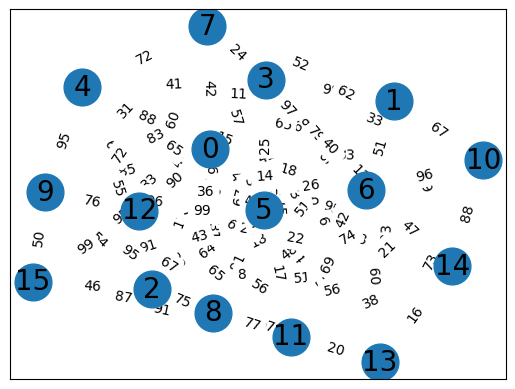

In [2]:
# Complete graph is required to generate travelling salesman problem 
G = nx.complete_graph(16)


# Then also need to assign weights to edges 
# These will be uniform integers in range 1, 100
import random 
for e in G.edges():
    G[e[0]][e[1]]['weight'] = random.randrange(1, 100)

# Plot new graph
pos = nx.spring_layout(G, seed=7)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [4]:
list(g.nodes())

NameError: name 'g' is not defined

In [55]:
list(G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [5]:
# Define a fitness function
def fitness(candidate, g):
    # Path weight
    pw = sum(g[i][j]['weight'] for i, j in tuple(zip(candidate, candidate[1:])))
    return pw

In [22]:
# Define big fat genetic algorithm function 
def genetic_algorithm(pop_size, elite_size, mutation_rate, generations, graph): 
    # Create initial population 
    population = []
    
    # The initial population 
    # Is a set of randomly ordered paths between all nodes 
    for i in range(pop_size):
        candidate = random.sample(list(graph.nodes()), graph.number_of_nodes()) # Shuffled list of nodes 
        population.append(candidate) # Add to population
    
    # The fitness of every individual is calculated
    for generation in range(generations):
        fitness_scores = []
        # Find fitness of every individual 
        for c in population:
            fitness_scores.append((fitness(c, graph), c)) # Fitness and candidate as tuple 
        
        # Sort the fitness scores ascending 
        fitness_scores.sort() 
        best_fit = fitness_scores[0][0]
        
        # Elitism 
        # Select the n fittest candidates to persist 
        elites = [c for fitness, c in fitness_scores[:elite_size]]
        
        # Tournament 
        parents = []
        while len(parents) <= 10:
            tournament = random.sample(fitness_scores, 4) # Randomly select two entries in fitness list
            parent = []
            
            for p in tournament:
                if not parent:
                    parent = p
                
                if parent[0] < p[0]:
                    parent = p
            
            # Append the fitter solution to parents list 
            if tournament[0][0] >= tournament[1][0]:
                parents.append(tournament[1][1])
            else:
                parents.append(tournament[0][1])
        
        # Create the next generation by mating the parents and mutating the offspring 
        offspring = []
        # Divide the parent arrays into pairs (::2 every even index; 1::2 every odd)
        for parent1, parent2 in zip(parents[::2], parents[1::2]):
            child_a = []
            child_b = []
            # For each pair of genes from the parents 
            for gene1, gene2 in zip(parent1, parent2):
                # Apply mutation with probability (reverse the gene)
                if random.random() < mutation_rate:
                   gene1, gene2 = gene2, gene1 
                
                # Append gene1... what happens to gene2? 
                child_a.append(gene1)
                child_b.append(gene2)
                
            # Append newly created chromosome 
            offspring.append(child_a)
            offspring.append(child_b)
        
        population = elites + offspring 
        
        # return the best individual found
        return fitness_scores[0][1]
                   
# Run the genetic algorithm to find the shortest path
best_individual = genetic_algorithm(pop_size = 100, elite_size = 20,
                                           mutation_rate = 0.2,
                                           generations = 100,
                                           graph=G)
                   
best_fitness = fitness(best_individual, G)
                   
print("Best path: ", best_individual)
print("Best fitness: ", best_fitness)

Best path:  [15, 3, 12, 2, 4, 11, 7, 0, 10, 9, 1, 14, 8, 5, 6, 13]
Best fitness:  538


In [10]:
# What is the expected cost to visit all 16 nodes? 
# To visit all 16 nodes requires 15 jumps  
# The average of the edge weights should be ~50 
# 50 x 15 = 750 

In [7]:
test = [[1,2],[3,4],[4,5],[6,7],[8,9],[10,11],[12,13],[14,15],[16,17],[18,19]]

for p1, p2 in zip(test[::2], test[1::2]):
    print(p1)
    print(p2)
    print(tuple(zip(p1,p2)))
    for g1, g2 in zip(p1, p2):
        print("here")
        print(g1,g2)
        g1,g2 = g2,g1
        print(g1,g2)

[1, 2]
[3, 4]
((1, 3), (2, 4))
here
1 3
3 1
here
2 4
4 2
[4, 5]
[6, 7]
((4, 6), (5, 7))
here
4 6
6 4
here
5 7
7 5
[8, 9]
[10, 11]
((8, 10), (9, 11))
here
8 10
10 8
here
9 11
11 9
[12, 13]
[14, 15]
((12, 14), (13, 15))
here
12 14
14 12
here
13 15
15 13
[16, 17]
[18, 19]
((16, 18), (17, 19))
here
16 18
18 16
here
17 19
19 17
